# **2.Valgs problematik**


## **2.1 Mængder**

### **2.1.1 Angiv udvælgelseskriterier**

**Trin 1 & 2**

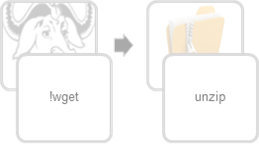

Vi anvender funksjonen, og unzip til at hente og udpakke bibliotek


```
!wget "" && unzip ""
```


In [ ]:
#@title wget og unzip
!wget https://chromedriver.storage.googleapis.com/2.42/chromedriver_linux64.zip  && unzip chromedriver_linux64

**Trin 3 & 4**

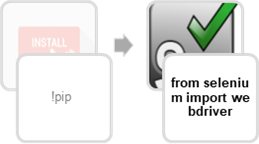

Derefter installere vi selenium og importere bibliotekket



```
!pip install selenium
```





In [ ]:
#@title instalere chromium, driver, og selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium
# set options to be headless, ..
from selenium import webdriver

**Trin 5**


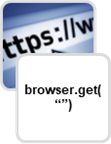

Vi initialisere webscrapperen, som vi vil hente data fra



```
browser = webdriver.Chrome('chromedriver',options=options)
browser.get("https://www.ssb.no/kommunefakta/")
```




In [ ]:
#@title initialisere webscrapperen
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
# open it, go to a website, and get results
browser = webdriver.Chrome('chromedriver',options=options)
browser.get("https://www.ssb.no/kommunefakta/")
#print(browser.page_source)  # results

### **2.1.2 Vælg tabeller / filer af interesse**

Vi downloader navne for kommuner i Norge

```
kommune_relationer=pd.read_csv("http://pvexpect.com/Driftsledelse/Dagligvarer/fylker_kommuner_region.csv")
```



In [ ]:
#@title nedlast fylker
import pandas as pd
kommune_relationer=pd.read_csv("http://pvexpect.com/Driftsledelse/Dagligvarer/fylker_kommuner_region.csv")

**Trin 6-10**

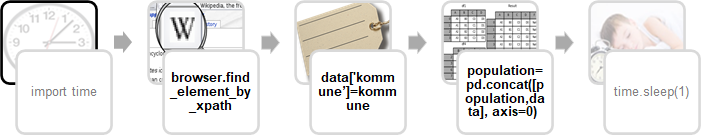

Vi importere tid
```
import time
```
Vi lokalisere download knappen
```
browser.find_element_by_xpath("/html/body/main/div[4]/div/div/div/div[2]/div/section[3]/div/button").click() 
```
Vi markere etiketten med kommunenavnet i en kolonne,

```
data['kommune']=kommune
```

Dernest sammenfører vi dataset ved av

```
population=pd.concat([population,data], axis=0) 
```

For at undgå at overbelaste serveren, venter vi med neste nedlastning

```
time.sleep(1)
```





In [ ]:
#@title nedlastning av data for befolkningstal
import time
population=pd.DataFrame()
for i, kommune in enumerate(kommune_relationer['kommune'][0:2]): #[0:2] #List over originale kommunenavne 
  print(kommune)
  #Konvertering til web-format
  browser.get("https://www.ssb.no/kommunefakta/"+str(kommune.lower().replace('ø','o').replace('å','a').replace(' ','-').replace("(","").replace(")","").replace("æ","ae"))) 
  try:
    browser.find_element_by_xpath("/html/body/main/div[4]/div/div/div/div[2]/div/section[3]/div/button").click() #Trykknap til visning af download knap
  except: #Håndtering af fejl
    print("feil"+str(kommune))
  browser.find_element_by_xpath("/html/body/main/div[4]/div/div/div/div[2]/div/section[3]/div/div[1]/figure/div/div[4]/div[3]/ul/li[6]").click() #Download
  data=pd.read_csv("aldersfordeling-per-1-ja.csv", delimiter=";") #Åbn fil
  data['kommune']=kommune
  population=pd.concat([population,data], axis=0) #Sammenfør datasæt
  print(population)
  time.sleep(3) #Overbelast ikke seriver


halden
              Category  Menn  Kvinner kommune
0               0-4 år  -756      675  halden
1               5-9 år  -853      813  halden
2             10-14 år  -940      959  halden
3             15-19 år -1020      878  halden
4             20-24 år -1016      892  halden
5             25-29 år -1005      847  halden
6             30-34 år  -961      942  halden
7             35-39 år  -892      923  halden
8             40-44 år -1041      929  halden
9             45-49 år -1063     1077  halden
10            50-54 år -1140     1129  halden
11            55-59 år -1105     1015  halden
12            60-64 år  -986      993  halden
13            65-69 år  -916      931  halden
14            70-74 år  -940      954  halden
15            75-79 år  -574      675  halden
16            80-84 år  -331      439  halden
17            85-89 år  -187      301  halden
18            90-94 år   -80      144  halden
19            95-99 år   -14       45  halden
20  100 år eller eldre    -

Nu er data klar til at vi kan se det.

Dette kan gjøres såledelse
```
alt.Chart(population).transform_fold(['Menn','Kvinner']).mark_bar().encode(
    y='Category:N',
    x='value:Q',
    color='key:N',
    tooltip='value:Q'
).properties(title="Befolkningstal")
```

Vi anvender funksjonen transform_fold for at sammenfører kolonnerne "Menn", "Kvinner" i en kolonne ved navn "value".
Derved er det muligt at vise begge kolonner samtidigt. Kolonnen "key" angiver om verdien i "value" er "Mann" eller "Kvinne".

```
.transform_fold(['Menn','Kvinner']).
```




In [ ]:
#@title Lodret histogram av befolkningstal
import altair as alt
alt.data_transformers.disable_max_rows()

alt.Chart(population).transform_fold(['Menn','Kvinner']).mark_bar().encode(
    y='Category:N',
    x='value:Q',
    color='key:N',
    tooltip='value:Q'
    
).properties(title="Befolkningstal") #.save("Befolkningstal.html")

alt.Chart(...)

### **2.1.3 Vælg data i en tabel / fil**


Dataset kan også ses, som en tabel:

In [ ]:
population #Se hele datasæt

Hvordan kan vi skape verdi med datasettet? og for hvilken målgruppe?